<a href="https://colab.research.google.com/github/HekmatTaherinejad95/Deep-ML/blob/main/pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [55]:
class Model(nn.Module):
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x



In [56]:
torch.manual_seed(41)
model = Model()

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_data = pd.read_csv(url)


In [59]:
my_data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [60]:
my_data['variety'] = my_data['variety'].replace('Setosa', 0.0)
my_data['variety'] = my_data['variety'].replace('Versicolor', 1.0)
my_data['variety'] = my_data['variety'].replace('Virginica', 2.0)
my_data

/tmp/ipykernel_640466/2881014917.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_data['variety'] = my_data['variety'].replace('Virginica', 2.0)


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [61]:
X = my_data.drop('variety', axis=1)
y = my_data['variety']

In [62]:
X = X.values
y = y.values

In [63]:
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [ ]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
epochs = 100
losses = []

for i in range(epochs):

  y_pred = model.forward(X_train)

  loss = criterion(y_pred, y_train)
  losses.append(loss.detach().numpy())

  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 1.125203251838684
Epoch: 10 and loss: 1.0097211599349976
Epoch: 20 and loss: 0.8162347674369812
Epoch: 30 and loss: 0.585993230342865
Epoch: 40 and loss: 0.4003389775753021
Epoch: 50 and loss: 0.26794716715812683
Epoch: 60 and loss: 0.1796349585056305
Epoch: 70 and loss: 0.12165623158216476
Epoch: 80 and loss: 0.0860651507973671
Epoch: 90 and loss: 0.06522614508867264


Text(0.5, 0, 'Epoch')

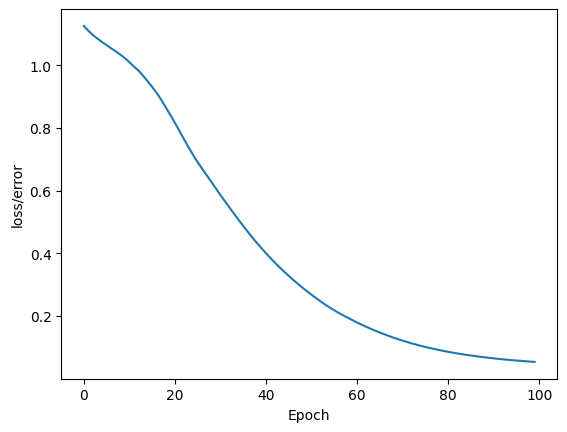

In [ ]:
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel('Epoch')

In [ ]:
with torch.no_grad():
  y_eval = model.forward(X_test)
  loss = criterion(y_eval, y_test)

In [ ]:
loss

tensor(0.1315)

In [ ]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    if y_test[i] == 0:
      x = "Setosa"
    elif y_test[i] == 1:
      x = 'Versicolor'
    else:
      x = 'Virginica'


    # Will tell us what type of flower class our network thinks it is
    print(f'{i+1}.)  {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct +=1

print(f'We got {correct} correct!')

1.)  tensor([-5.8771,  4.4629,  6.5155]) 	 2 	 2
2.)  tensor([-7.5451,  4.1668,  9.7293]) 	 2 	 2
3.)  tensor([-8.4517,  5.1275, 10.2015]) 	 2 	 2
4.)  tensor([-4.3411,  5.6280,  2.5636]) 	 1 	 1
5.)  tensor([-7.1838,  4.8757,  8.3023]) 	 2 	 2
6.)  tensor([-3.3940,  5.3421,  1.2802]) 	 1 	 1
7.)  tensor([-5.9240,  4.9826,  6.0025]) 	 2 	 2
8.)  tensor([-4.2895,  5.7016,  2.3920]) 	 1 	 1
9.)  tensor([-6.5369,  4.9261,  7.1291]) 	 2 	 2
10.)  tensor([-8.0526,  4.4129, 10.3325]) 	 2 	 2
11.)  tensor([-5.6775,  4.9505,  5.6248]) 	 2 	 2
12.)  tensor([ 4.5748, -2.2579, -2.8925]) 	 0 	 0
13.)  tensor([ 4.2646, -2.0055, -2.7342]) 	 0 	 0
14.)  tensor([-2.1081,  4.0482,  0.5803]) 	 1 	 1
15.)  tensor([ 3.4608, -1.2147, -2.3488]) 	 0 	 0
16.)  tensor([-5.4739,  5.1174,  5.0966]) 	 2 	 1
17.)  tensor([ 4.0637, -1.8045, -2.6504]) 	 0 	 0
18.)  tensor([-5.8090,  4.6057,  6.2494]) 	 1 	 2
19.)  tensor([ 4.9250, -2.5763, -3.0545]) 	 0 	 0
20.)  tensor([ 3.4559, -1.2559, -2.3637]) 	 0 	 0
21.)  ten

In [ ]:
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])

In [ ]:
with torch.no_grad():
  print(model(new_iris))

tensor([ 4.5445, -2.2478, -2.8698])


In [ ]:
torch.save(model.state_dict(), 'my_really_awesome_iris_model.pt')

In [ ]:
new_model = Model()
new_model.load_state_dict(torch.load('my_really_awesome_iris_model.pt'))

<All keys matched successfully>

In [ ]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

## New Example

We will create an image classifier to detect playing cards.

We will tackle this problem in 3 parts:
1. Pytorch Dataset
2. Pytorch Model
3. Pytorch Training Loop

Almost every pytorch model training pipeline meets this paradigm.

In [64]:
import torch
import torch.nn as nn
import torch.optim as optim 
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import timm

import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline



In [65]:
print("System Version:")
print(sys.version)

print("Torch Version:")
print(torch.__version__)

print("Torchvision Version:")
print(torchvision.__version__)

print("Timm Version:")
print(timm.__version__)

System Version:
3.12.4 | packaged by Anaconda, Inc. | (main, Jun 18 2024, 15:12:24) [GCC 11.2.0]
Torch Version:
2.5.1+cu124
Torchvision Version:
0.20.1+cu124
Timm Version:
1.0.13


### Step 1. Pytorch Dataset (and DataLoader)

In [66]:
class PlayingCardDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data = ImageFolder(data_dir, transform=transform)

    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        return self.data[idx]

    @property
    def classes(self):
        return self.data.classes

In [67]:
!pip install kagglehub

In [68]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("gpiosenka/cards-image-datasetclassification")

print("Path to dataset files:", path)

Path to dataset files: /home/hekmat/.cache/kagglehub/datasets/gpiosenka/cards-image-datasetclassification/versions/2


In [69]:
dataset = PlayingCardDataset(data_dir=path + "/train")

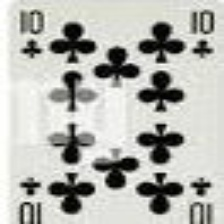

In [70]:
image, label = dataset[6000]

image

In [71]:
data_dir = path + "/train"
target_to_class = {v: k for k, v in ImageFolder(data_dir).class_to_idx.items()}
print(target_to_class)

{0: 'ace of clubs', 1: 'ace of diamonds', 2: 'ace of hearts', 3: 'ace of spades', 4: 'eight of clubs', 5: 'eight of diamonds', 6: 'eight of hearts', 7: 'eight of spades', 8: 'five of clubs', 9: 'five of diamonds', 10: 'five of hearts', 11: 'five of spades', 12: 'four of clubs', 13: 'four of diamonds', 14: 'four of hearts', 15: 'four of spades', 16: 'jack of clubs', 17: 'jack of diamonds', 18: 'jack of hearts', 19: 'jack of spades', 20: 'joker', 21: 'king of clubs', 22: 'king of diamonds', 23: 'king of hearts', 24: 'king of spades', 25: 'nine of clubs', 26: 'nine of diamonds', 27: 'nine of hearts', 28: 'nine of spades', 29: 'queen of clubs', 30: 'queen of diamonds', 31: 'queen of hearts', 32: 'queen of spades', 33: 'seven of clubs', 34: 'seven of diamonds', 35: 'seven of hearts', 36: 'seven of spades', 37: 'six of clubs', 38: 'six of diamonds', 39: 'six of hearts', 40: 'six of spades', 41: 'ten of clubs', 42: 'ten of diamonds', 43: 'ten of hearts', 44: 'ten of spades', 45: 'three of clu

In [72]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

dataset = PlayingCardDataset(data_dir, transform=transform)

In [73]:
image, label = dataset[0]

image.shape

torch.Size([3, 128, 128])

In [74]:
for image, label in dataset:
    # print(image.shape, label)
    break

### DataLoader

In [75]:
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

In [76]:
for image, label in dataloader:
    # print(image.shape, label)
    break

In [77]:
label

tensor([ 0, 30, 18, 11, 43, 42, 37,  2, 38,  3, 18, 48,  9,  5,  6, 35,  3,  2,
        19,  2,  5, 16, 14,  5, 18, 11, 15, 50, 46, 45, 43, 12])

### Step 2. Pytorch Model

In [104]:
class SimpleCardClassifier(nn.Module):
    def __init__(self, num_classes=53):
        super(SimpleCardClassifier, self).__init__()
        # Where we define all the parts of the model
        self.base_model = timm.create_model('efficientnet_b0', pretrained=True)
        self.features = nn.Sequential(*list(self.base_model.children())[:-1])

        enet_out_size = 1280
        # Make a classifier
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(enet_out_size, num_classes)
        )
    
    def forward(self, x):
        # Connect these parts and return the output
        x = self.features(x)
        output = self.classifier(x)
        return output

In [105]:
model = SimpleCardClassifier(num_classes=53)
print(str(model)[:500])


SimpleCardClassifier(
  (base_model): EfficientNet(
    (conv_stem): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn1): BatchNormAct2d(
      32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
      (drop): Identity()
      (act): SiLU(inplace=True)
    )
    (blocks): Sequential(
      (0): Sequential(
        (0): DepthwiseSeparableConv(
          (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=Fa


In [106]:
example_out = model(image)
example_out.shape

torch.Size([32, 53])

### Step 3. The training loop

In [107]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [108]:
criterion(example_out, label)

tensor(4.0811, grad_fn=<NllLossBackward0>)

In [109]:
data_dir = path 
target_to_class = {v: k for k, v in ImageFolder(data_dir).class_to_idx.items()}
print(target_to_class)

{0: 'test', 1: 'train', 2: 'valid'}


In [110]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

train_dataset = PlayingCardDataset(data_dir=path + "/train", transform=transform)
test_dataset = PlayingCardDataset(data_dir=path + "/test", transform=transform)
val_dataset = PlayingCardDataset(data_dir=path + "/valid", transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [117]:
# from tqdm.notebook import tqdm

num_epochs = 5
train_losses, val_losses = [], []

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = SimpleCardClassifier(num_classes=53)
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(num_epochs):
    # Training phase
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        # Move inputs and labels to the device
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * labels.size(0)
    train_loss = running_loss / len(train_loader.dataset)
    train_losses.append(train_loss)
    
    # Validation phase
    model.eval()
    running_loss = 0.0
    with torch.no_grad():
        for images, labels in tqdm(val_loader, desc='Validation loop'):
            # Move inputs and labels to the device
            images, labels = images.to(device), labels.to(device)
         
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * labels.size(0)
    val_loss = running_loss / len(val_loader.dataset)
    val_losses.append(val_loss)
    print(f"Epoch {epoch+1}/{num_epochs} - Train loss: {train_loss}, Validation loss: {val_loss}")

ImportError: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html